In [6]:
import torch
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import matplotlib.pyplot as plt

In [7]:
latent = np.loadtxt("latent.txt")
latent

array([[-2.03224015e+00, -1.71049685e+00,  8.81759118e-01, ...,
         1.98178611e+00,  1.17522481e+00, -3.42950636e-01],
       [-2.24542069e+00,  4.05728586e-02,  1.69407057e+00, ...,
        -2.17008994e+00, -1.04012449e+00,  2.33803227e-01],
       [-3.31940300e-01,  5.23079328e-01,  1.49536647e-01, ...,
        -4.93729759e-02, -4.19146960e-01,  9.28654148e-01],
       ...,
       [-7.67727559e-01,  1.46795650e+00, -1.76525313e+00, ...,
        -9.44722480e-02, -1.80983245e+00,  1.25976440e+00],
       [ 5.71584348e-01, -1.68468084e+00,  1.91427126e-03, ...,
        -4.82330670e+00, -1.13949777e-01,  3.36271781e-01],
       [ 2.98880280e-01, -2.44545501e+00, -1.03889128e+00, ...,
        -1.12605905e-01, -5.51206429e-01, -1.83957498e+00]])

/home/zyuan/.local/share/virtualenvs/virtualenv-nmx37veW/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


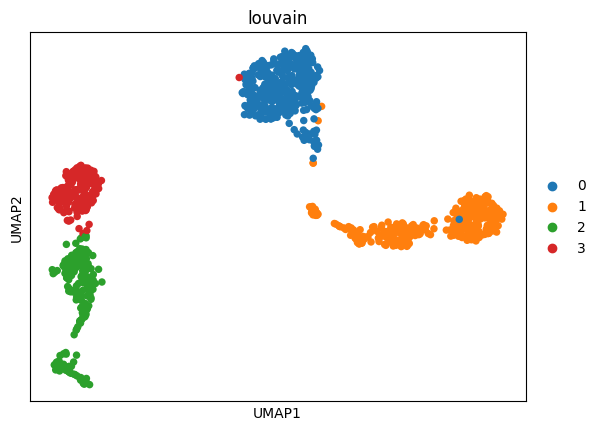

/home/zyuan/.local/share/virtualenvs/virtualenv-nmx37veW/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/zyuan/.local/share/virtualenvs/virtualenv-nmx37veW/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


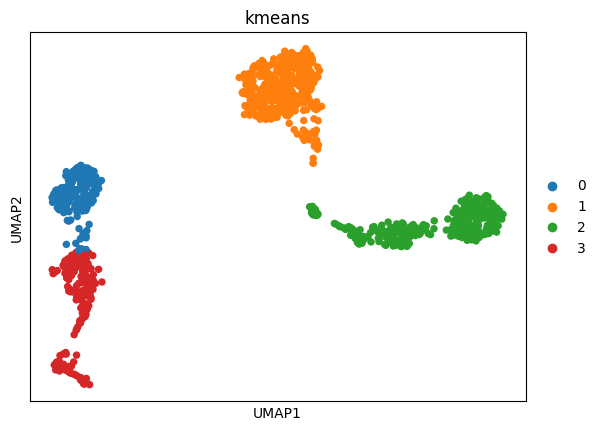

In [13]:
%matplotlib inline
# visulization
prior_adata = anndata.AnnData(X=latent)
prior_adata.obsm["X_multi_vi"] = latent
sc.pp.neighbors(prior_adata, use_rep="X_multi_vi", n_neighbors=30)
sc.tl.umap(prior_adata, min_dist=0.3)

# cluster by louvain
sc.tl.louvain(prior_adata, resolution=0.16)   
sc.pl.umap(prior_adata, color=['louvain'])
plt.show()

# cluster by kmeans
from sklearn.cluster import KMeans
latent_code = prior_adata.obsm["X_umap"]

kmeans = KMeans(n_clusters=4, random_state=0).fit(latent_code) 
prior_adata.obs['kmeans'] = kmeans.labels_.astype(str)
sc.pl.umap(prior_adata, color=['kmeans'])

In [9]:
latent_code

array([[14.544391 ,  2.7171588],
       [-2.9134762,  1.7817477],
       [ 6.707211 ,  9.872575 ],
       ...,
       [ 7.2076607,  9.670948 ],
       [-3.9986253, -3.8553216],
       [12.232584 ,  2.7134645]], dtype=float32)

In [10]:
latent_code.shape

(1039, 2)